## Contexto problema


Para esta actividad utilizaremos un subconjunto de 25 ítems de la International Personality
Item Pool, aplicados a 2800 individuos. El objetivo de esta información es desarrollar
perfiles de personalidad en base a una serie de oraciones asociadas a las características
Amabilidad, Escrupulosidad, Extroversión, Neuroticismo, Apertura Los individuos deben
responder qué tan adecuada es la oración respecto a su personalidad en base a 6
categorías:
1. No me representa para nada.
2. No me representa.
3. Algunas cosas no me representan.
4. Algunas cosas me representan.
5. Me representa.
6. Me representa completamente

#### Las preguntas

- A1 Soy indiferente a los sentimientos de otros.
- A2 Me preocupo del bienestar de otros.
- A3 Sé cómo confortar a otros.
- A4 Me agradan los niños.
- A5 Hago sentir tranquila a la gente.
- C1 Soy exacto en mi trabajo.
- C2 Sigo con mis tareas hasta que todo esté perfecto.
- C3 Hago cosas siguiendo un plan.
- C4 Hago cosas con el mínimo esfuerzo.
- C5 Pierdo mi tiempo.
- E1 No hablo mucho con las personas.
- E2 Me es difícil acercarme a otros.
- E3 Sé cómo cautivar a la gente.
- E4 Hago amigos de forma fácil.
- E5 Puedo tomar el cargo de las cosas.
- N1 Me enojo con facilidad.
- N2 Me irrito con facilidad.
- N3 Tengo cambios de humor frecuentes.
- N4 Usualmente me siento melancólico.
- N5 Entró en pánico con facilidad.
- O1 Estoy lleno de ideas.
- O2 Evito leer material difícil.
- O3 Tiendo a llevar la conversación a niveles más altos.
- O4 Dedico tiempo a la reflexión de cosas.
- O5 No profundizaré sobre una materia específica.

Variable demograficas

- gender Hombre = 1, Mujer =2.
- education 1 = Educación Media Incompleta, 2 = Educación Media Completa, 3 = Educación Universitaria Incompleta, 4 = Educación Universitaria Completa 5 = Estudios de Postgrado.
- age Edad en Años.

In [7]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
import statsmodels.formula.api as smf

import factor_analyzer as fact

import missingno as msngo
import warnings

warnings.filterwarnings(action='ignore')

plt.style.use('seaborn') # gráficos estilo seaborn
plt.rcParams["figure.figsize"] = (10, 6) # Tamaño gráficos
plt.rcParams["figure.dpi"] = 60 # resolución gráficos

# Desafío 1: Lectura de archivos

- Importe las librerías necesarias para el análisis factorial siguiendo las convenciones.
- Importe la base de datos bfi.csv y asígnela a un objeto df.
- Solicite las primeras 5 observaciones con head

In [8]:
df = pd.read_csv('bfi.csv')
df.shape

(2800, 29)

In [9]:
df.head()

,Unnamed: 0,A1,A2,A3,A4,A5,C1,C2,C3,C4,...,N4,N5,O1,O2,O3,O4,O5,gender,education,age
0,61617,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,...,2.0,3.0,3.0,6,3.0,4.0,3.0,1,NaN,16
1,61618,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,...,5.0,5.0,4.0,2,4.0,3.0,3.0,2,NaN,18
2,61620,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,...,2.0,3.0,4.0,2,5.0,5.0,2.0,2,NaN,17
3,61621,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,...,4.0,1.0,3.0,3,4.0,3.0,5.0,2,NaN,17
4,61622,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,...,4.0,3.0,3.0,3,4.0,3.0,3.0,1,NaN,17


# Desafío 2: Preprocesamiento

- Elimine las columnas redundantes de la base, tal como 'Unnamed: 0'.
- Analice el patrón de datos perdidos con missingno. Comente cuáles son las principales variables con mayores tasas de valores perdidos.
- Genere un nuevo objeto donde almacenará la base sin valores perdidos.

In [10]:
df.drop('Unnamed: 0', axis = 1, inplace=True)

<AxesSubplot:>

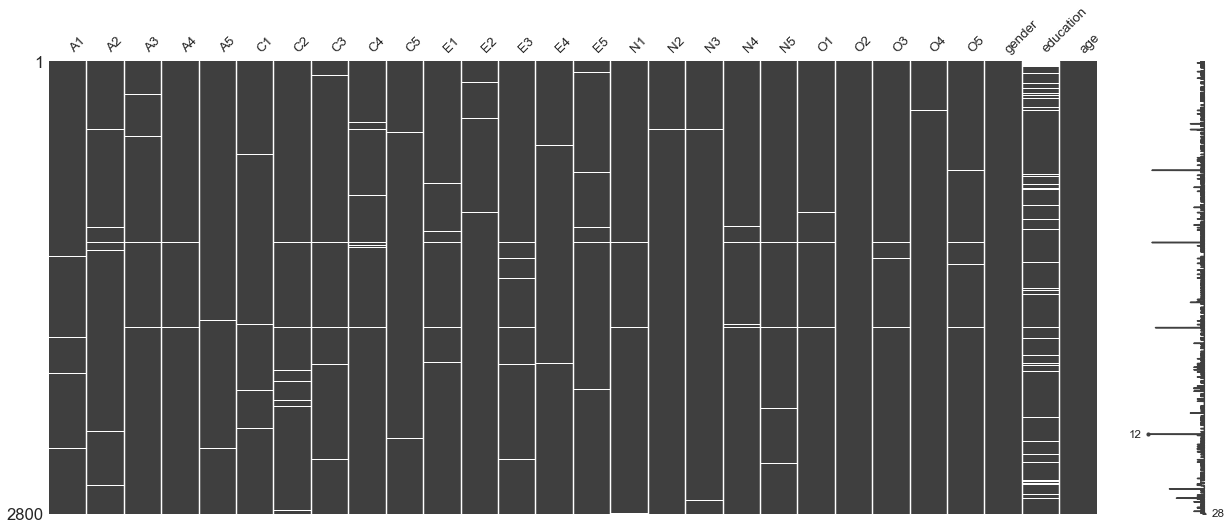

In [11]:
msngo.matrix(df)

<AxesSubplot:>

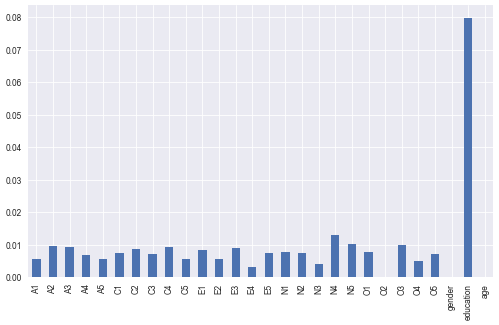

In [12]:
df.isna().mean().plot(kind='bar')

<AxesSubplot:xlabel='age'>

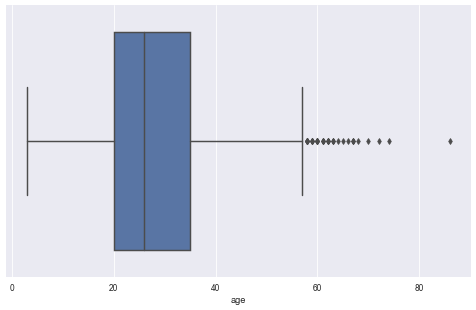

In [17]:
sns.boxplot(df['age'])

In [14]:
df_clean = df.dropna()
df_clean.shape

(2236, 28)

<AxesSubplot:>

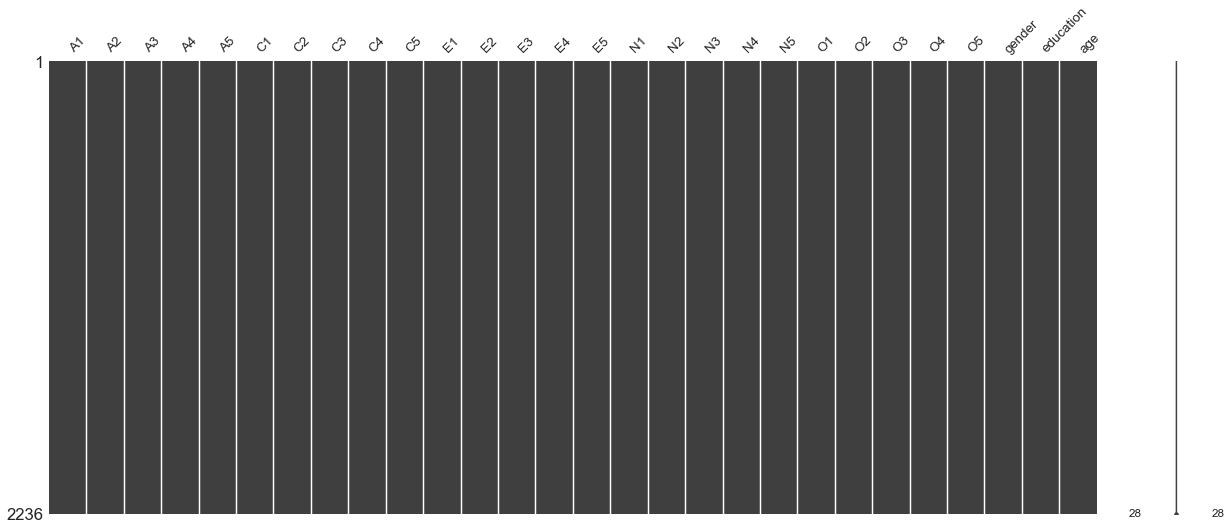

In [15]:
msngo.matrix(df_clean)

# Desafío 3: Descripción

- Separe en un nuevo objeto DataFrame la batería de preguntas a extraer.
- Reporte las medias para cada una de las preguntas de la batería. Esto lo puede lograr con un dotplot.
- Genere una matriz de correlaciones con este nuevo objeto. Visualízalo con heatmap. Comente sobre los principales patrones de correlación entre las preguntas de la batería.

In [18]:
personality_df = df_clean.loc[:, 'A1':'O5']
personality_df.shape

(2236, 25)

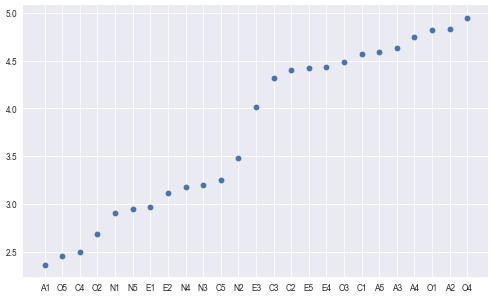

In [21]:
plt.plot(personality_df.mean().sort_values(), "o")

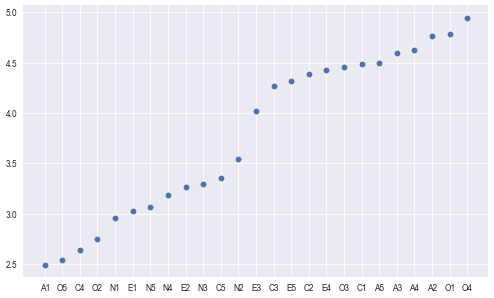

In [20]:
plt.plot(personality_df[df_clean.age<30].mean().sort_values(), "o")

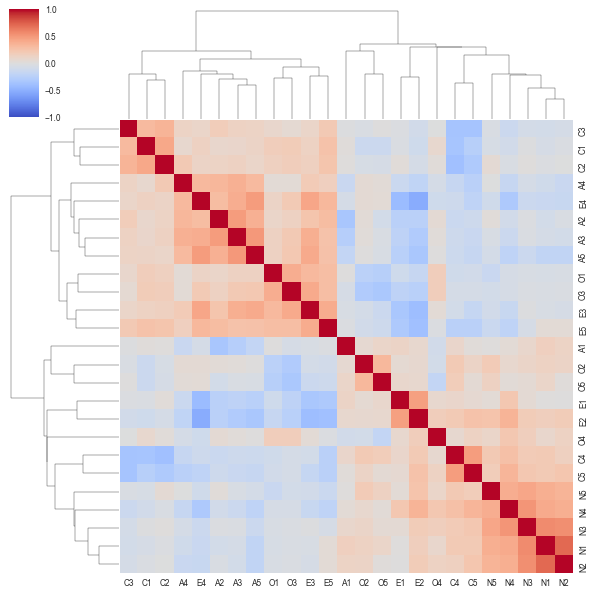

In [25]:
sns.clustermap(personality_df.corr(), cmap='coolwarm', vmin=-1, vmax=1)

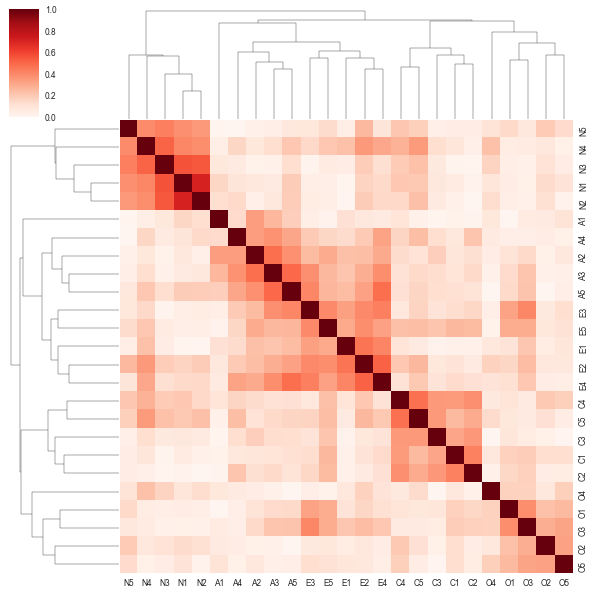

In [24]:
sns.clustermap(np.abs(personality_df.corr()), cmap='Reds', vmin=0, vmax=1)

# Desafío 4: Extracción de factores

- Antes de iniciar la extracción de factores, inspeccione la idoneidad de la batería de preguntas para realizar un análisis factorial mediante la prueba de esfericidad de Barlett y Kaiser-Meyer-Olkin. Comente los resultados.

- Instancie un objeto con FactorAnalyzer() donde se estimen 10 dimensiones latentes y no se aplique rotación.

- Genere un scree plot entre los eigenvalues del modelo y la cantidad de dimensiones estimables.

- Refactoriza el objeto con FactorAnalyzer() para incluir la cantidad de dimensiones válidas que informó el scree plot.

- Extraiga las cargas del modelo e identifique qué ítems están asociados a cada λ factor. Comente sobre qué significa cada factor construído


In [24]:
statistic, pvalue = fact.calculate_bartlett_sphericity(personality_df)
statistic, pvalue

(16509.673550497206, 0.0)

In [34]:
kmo_variable, kmo_global = fact.calculate_kmo(personality_df)
pd.DataFrame({'variable':personality_df.columns, 'kmo' : kmo_variable}).sort_values('kmo')

,variable,kmo
0,A1,0.737832
24,O5,0.758049
15,N1,0.778127
16,N2,0.778453
23,O4,0.781118
21,O2,0.783811
6,C2,0.788420
8,C4,0.823646
22,O3,0.833744
1,A2,0.834263


In [35]:
kmo_global

0.8468295031833754

In [26]:
personality_factor = fact.FactorAnalyzer(n_factors=6)
personality_factor.fit(personality_df)

FactorAnalyzer(n_factors=6, rotation_kwargs={})

In [27]:
personality_eigenvalues = personality_factor.get_eigenvalues()[0]
personality_eigenvalues

array([5.06851622, 2.7624793 , 2.152623  , 1.89233295, 1.51753291,
       1.07882932, 0.83090573, 0.80450025, 0.7140883 , 0.7015381 ,
       0.6808421 , 0.64897347, 0.63125633, 0.58803197, 0.5659652 ,
       0.54483958, 0.51993349, 0.49386855, 0.48273618, 0.44250032,
       0.42887063, 0.40709741, 0.38887531, 0.38476259, 0.2681008 ])

Text(0, 0.5, 'Eigenvalues')

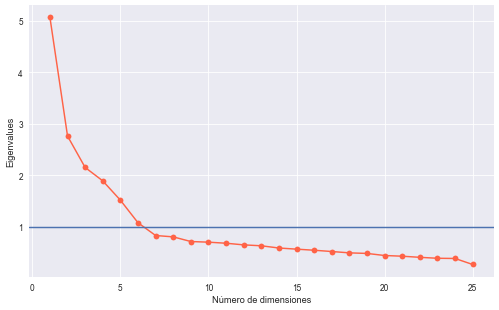

In [28]:
plt.plot(range(1, personality_eigenvalues.shape[0] + 1),
personality_eigenvalues, 'o-', color='tomato')
plt.axhline(1)
plt.xlabel("Número de dimensiones")
plt.ylabel("Eigenvalues")

In [32]:
personality_loadings = pd.DataFrame(personality_factor.loadings_)
personality_loadings.columns = ['Factor1','Factor2', 'Factor3','Factor4', 'Factor5','Factor6']

In [33]:
personality_loadings = personality_loadings.applymap(lambda x: np.where(x < .4, ' ', round(x,2)))
personality_loadings.index = personality_df.columns
personality_loadings

,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6
A1,,,,,,
A2,,,,,0.64,
A3,,,,,0.49,
A4,,,,,,
A5,,,,,,
C1,,,0.59,,,
C2,,,0.74,,,
C3,,,0.61,,,
C4,,,,,,0.48
C5,,,,,,


# Desafío 5: Modelación de factores

- Extraiga los puntajes del modelo factorial a su base de datos.
- Grafique la densidad de cada uno con kdplot.
- Modele y comente brevemente sobre cuáles son los principales determinantes de cada factor en base al siguiente modelo estimable:

𝑦 = β0 + β1 · 𝑔𝑒𝑛𝑑𝑒𝑟 + β2 · 𝑒𝑑𝑢𝑐𝑎𝑡𝑖𝑜𝑛 + β1 · 𝑎𝑔𝑒 + ε𝑖

In [34]:
personality_scores = pd.DataFrame(personality_factor.transform(personality_df))
personality_scores.columns = ['Factor1','Factor2', 'Factor3','Factor4', 'Factor5','Factor6']

<AxesSubplot:xlabel='Factor1', ylabel='Density'>

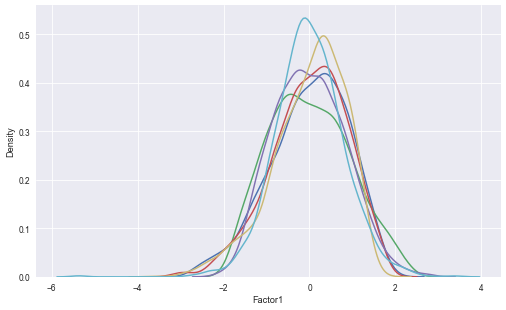

In [35]:
sns.kdeplot(personality_scores.Factor1.dropna())
sns.kdeplot(personality_scores.Factor2.dropna())
sns.kdeplot(personality_scores.Factor3.dropna())
sns.kdeplot(personality_scores.Factor4.dropna())
sns.kdeplot(personality_scores.Factor5.dropna())
sns.kdeplot(personality_scores.Factor6.dropna())

In [36]:
df_final = pd.concat([df_clean.reset_index(drop=True), personality_scores], axis=1)
df_final['gender'] = df_final['gender'].replace([1, 2], [1, 0])

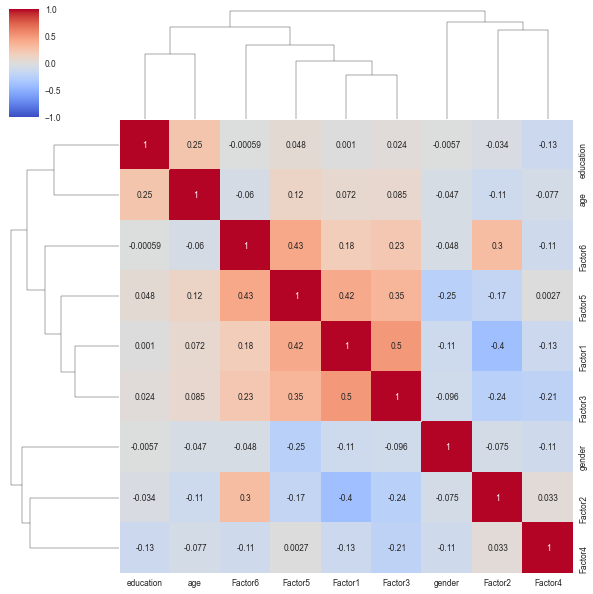

In [37]:
cor = df_final.loc[:, ['Factor1','Factor2', 'Factor3','Factor4', 'Factor5','Factor6', 'gender', 'education', 'age']].corr()
sns.clustermap(cor, cmap='coolwarm', vmin=-1, vmax=1, annot=True)

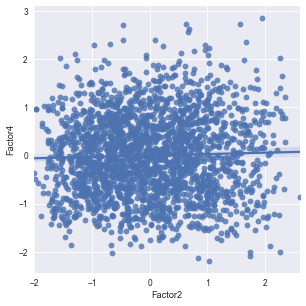

In [51]:
sns.lmplot(data = df_final, x = 'Factor2', y = 'Factor4')

In [52]:
for i in ['Factor1','Factor2', 'Factor3','Factor4', 'Factor5','Factor6']:
    print(i)
    print(smf.ols(i + "~ gender + education + age", df_final).fit().summary().tables[1])

Factor1
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0640      0.073     -0.875      0.382      -0.207       0.079
gender        -0.2157      0.041     -5.252      0.000      -0.296      -0.135
education     -0.0143      0.018     -0.797      0.425      -0.049       0.021
age            0.0061      0.002      3.272      0.001       0.002       0.010
Factor2
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3591      0.074      4.825      0.000       0.213       0.505
gender        -0.1592      0.042     -3.810      0.000      -0.241      -0.077
education     -0.0053      0.018     -0.294      0.769      -0.041       0.030
age           -0.0098      0.002     -5.164      0.000      -0.014      -0.006
Factor3
                 coef    std